# **DATA UNDERSTANDING**

## **CONTEXT**

Terdapat suatu perusahaan yang bernama "Northwind Traders", yang mana perusahaan ini bergerak di bidang ekspor dan impor makanan dari dan ke seluruh dunia. Database ini berisikan data penjualan dan data karyawan dari perusahaan tersebut. Fokus analisis pada analisis kali ini adalah tentang data karyawan dari perusahaan Northwind. Apakah performa dari karyawan yang berkerja di perusahaan ini sudah cukup sesuai dengan gaji yang diberikan oleh perusahaan? dan strategi pemasaran seperti apa yang bisa diterapkan perusahaan untuk bisa meningkatkan revenue nya di tahun-tahun berikutnya?

## **Database Information**

Database ini memiliki 11 buah tabel, yaitu :
* orders : data transaksi antara perusahaan dengan customer
* order details : data detail order antara perusahaan dengan customer
* customers : data pelanggan dari perusahaan Northwind di seluruh dunia
* product : data produk yang dijual oleh perusahaan Northwind
* supplier : data supplier dan vendor produk dari perusahaan Northwind
* categories : data kategori dari setiap produk yang dijual dan keterangan masing-masing produk
* employees : data seputar karyawan di perusahaan Northwind
* employee_territories : data territories id pemasaran produk
* territories : data kota tempat area pemasaran produk
* region : data region wilayah area pemasaran produk
* shippers : data ekspedisi pengiriman produk

setiap tabel yang tertera pada database dapat terhubung baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

In [851]:
from IPython.display import Image
Image(url="northwind-er-diagram.png", width=700, height=500)

# **DATABASE**

## **Connecting to Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``Northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [852]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector


In [853]:
# connect to database

mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Akusokuzan190788',
    database = 'project_2'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [854]:
mycursor = mydb.cursor()

def sqldf(query):
    mycursor.execute(query)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

Pada data Tabel 1 ini menampilkan data informasi secara umum karyawan yang berkerja di perusahaan Northwind Traders. data ini adalah gabungan dari beberapa tabel yaitu ```tabel employees```, ```tabel employeeterritories```, ```tabel territories```, dan ```tabel region```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :

* lastname dari tabel employee
* firstname dari tabel employee
* birthdate dari tabel employee
* hiredate dari tabel employee
* salary dari tabel employee
* territorydescription dari table territories
* regiondescription dari tabel region




In [855]:
df1 = sqldf('''
select em.employeeid, em.lastname,em.firstname,em.title,em.birthdate,em.hiredate,em.salary, ter.territorydescription territory, reg.regiondescription region
from employees em
left join employeeTerritories emt on em.employeeid = emt.employeeid
left join territories ter on emt.territoryid = ter.territoryid
left join region reg on ter.regionid = reg.regionid;
''')

menampilkan 5 data teratas dari tabel 1

In [856]:
df1.head()

,employeeid,lastname,firstname,title,birthdate,hiredate,salary,territory,region
0,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,Wilton ...,Eastern ...
1,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,Neward ...,Eastern ...
2,2,Fuller,Andrew,"Vice President, Sales",1952-02-19,1992-08-14,2254.49,Westboro ...,Eastern ...
3,2,Fuller,Andrew,"Vice President, Sales",1952-02-19,1992-08-14,2254.49,Bedford ...,Eastern ...
4,2,Fuller,Andrew,"Vice President, Sales",1952-02-19,1992-08-14,2254.49,Georgetow ...,Eastern ...


Pada data Tabel 2 ini menampilkan data informasi mengenai transaksi yang dilakukan oleh perusahaan Northwind Traders dengan customer. data ini adalah gabungan dari beberapa tabel yaitu ```tabel orders```, ```tabel orderdetails```, ```tabel products```, dan ```tabel categories```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :

* employeeid dari tabel orders
* orderdate dari tabel orders
* shippeddate dari tabel orders
* unitprice dari tabel orderdetails
* quantity dari tabel orderdetails
* productname dari tabel products
* categoryname dari table categories
* description dari tabel categories

In [857]:
df2 = sqldf('''select ord.employeeid, ord.orderdate, ord.shippeddate, ordd.unitprice, ordd.quantity, prd.productname product, cat.categoryname category, cat.description
from orders ord
left join orderdetails ordd on ord.orderid = ordd.orderid 
left join products prd on ordd.productid = prd.productid
left join categories cat on prd.categoryid = cat.categoryid;
''')

menampilkan 5 data teratas dari tabel 2

In [858]:
df2.head()

,employeeid,orderdate,shippeddate,unitprice,quantity,product,category,description
0,5,1996-07-04,1996-07-16,14.0000,12,Queso Cabrales,Dairy Products,Cheeses
1,5,1996-07-04,1996-07-16,9.8000,10,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal"
2,5,1996-07-04,1996-07-16,34.8000,5,Mozzarella di Giovanni,Dairy Products,Cheeses
3,6,1996-07-05,1996-07-10,18.6000,9,Tofu,Produce,Dried fruit and bean curd
4,6,1996-07-05,1996-07-10,42.4000,40,Manjimup Dried Apples,Produce,Dried fruit and bean curd


setelah menampilkan kedua tabel, maka tabel 1 dan tabel 2 akan digabungkan menjadi 1 tabel yang nantinya akan berisikan informasi gabungan yang berisikan data karyawan yang melakukan transaksi dengan customer perusahaan, sehingga nantinya dari tabel inilah yang akan menjadi starting point untuk dapat melakukan analisis mengenai performa karyawan di perusahaan Northwind ini. 

kedua tabel ini digabungkan dengan metode merging, dengan kolom employeeid sebagai penyambung dar tabel 1 dan tabel 2 agar terjadi sinkronisasi data dari setiap tabel

In [859]:
df = df1.merge(df2,how='inner',on='employeeid')

menampilkan 5 data teratas dari tabel hasil gabungan

In [860]:
df.head()

,employeeid,lastname,firstname,title,birthdate,hiredate,salary,territory,region,orderdate,shippeddate,unitprice,quantity,product,category,description
0,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,Wilton ...,Eastern ...,1996-07-17,1996-07-23,15.2000,50,Chang,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,Wilton ...,Eastern ...,1996-07-17,1996-07-23,17.0000,65,Chef Anton's Gumbo Mix,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,Wilton ...,Eastern ...,1996-07-17,1996-07-23,25.6000,6,Mascarpone Fabioli,Dairy Products,Cheeses
3,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,Wilton ...,Eastern ...,1996-08-01,1996-08-02,15.2000,30,Inlagd Sill,Seafood,Seaweed and fish
4,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,Wilton ...,Eastern ...,1996-08-01,1996-08-02,36.8000,25,Ipoh Coffee,Beverages,"Soft drinks, coffees, teas, beers, and ales"


# **DATA MANIPULATION**

Sebelum memulai analisis, data tabel gabungan ini akan ditambahkan terlebih dahulu beberapa fitur / kolom baru yang berguna untuk membantu menganalisis dari permasalahan yang akan dijawab yang berkaitan dengan performa karyawan perusahaan Northwind. Fitur yang akan kita tambahkan yaitu :
* kolom age
* kolom dayshipping
* kolom total price

penambahan kolom umur berguna untuk mengetahui berapa umur karyawan yang bersangkutan saat di hire oleh perusahaan Northwind. kolom ini merupakan hasil pengurangan dari kolom hiredate dikurangi kolom birthdate.

In [861]:
# kolom age

df.insert(6,'age',df['hiredate'].dt.year - df['birthdate'].dt.year)

penambahan kolom dayshipping untuk mengetahui berapa lama produk dikirimkan oleh perusahaan dari semenjak produk diorder. kolom ini merupakan hasil pengurangan dari kolom shippeddate dikurangi kolom orderdate.

In [862]:
# kolom dayshipping

df.insert(12,'dayshipping', df['shippeddate'] - df['orderdate'])

penambahan kolom total price untuk mengetahui berapa total pendapatan yang diterima perusahaan dari setiap produk yang terjual. kolom ini merupakan hasil kali antara kolom unitprice dengan kolom quantity.

In [863]:
# kolom totalprice

df.insert(15,'totalprice',df['unitprice']*df['quantity'])

agar lebih memudahkan untuk membaca data tabel baru, maka dapat dihilangkan kolom - kolom yang dirasa tidak begitu penting. seperti pada kolom last name dan kolom first name, dapat digabungkan saja keduanya menjadi 1 kolom nama. lalu kolom employeeid dapat pula dihilangkan saja karena sudah terwakili oleh kolom nama yang baru saja dibuat.

In [864]:
df.insert(3, 'name', df['lastname'] + ' ' + df['firstname'])

In [865]:
df.drop(['employeeid','firstname','lastname'],axis=1,inplace=True)


Cek 5 data teratas tabel baru setelah dilakukan penambahan / pengurangan feature

In [866]:
df.head()

,name,title,birthdate,hiredate,age,salary,territory,region,orderdate,shippeddate,dayshipping,unitprice,quantity,totalprice,product,category,description
0,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-07-17,1996-07-23,6 days,15.2000,50,760.0000,Chang,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-07-17,1996-07-23,6 days,17.0000,65,1105.0000,Chef Anton's Gumbo Mix,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-07-17,1996-07-23,6 days,25.6000,6,153.6000,Mascarpone Fabioli,Dairy Products,Cheeses
3,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-08-01,1996-08-02,1 days,15.2000,30,456.0000,Inlagd Sill,Seafood,Seaweed and fish
4,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-08-01,1996-08-02,1 days,36.8000,25,920.0000,Ipoh Coffee,Beverages,"Soft drinks, coffees, teas, beers, and ales"


# **CEK ANOMALIES**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data gabungan tabel 1 dan tabel 2. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

In [867]:
# cek informasi dari tabel baru

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   name         10129 non-null  object         
 1   title        10129 non-null  object         
 2   birthdate    10129 non-null  datetime64[ns] 
 3   hiredate     10129 non-null  datetime64[ns] 
 4   age          10129 non-null  int64          
 5   salary       10129 non-null  float64        
 6   territory    10129 non-null  object         
 7   region       10129 non-null  object         
 8   orderdate    10129 non-null  datetime64[ns] 
 9   shippeddate  9840 non-null   datetime64[ns] 
 10  dayshipping  9840 non-null   timedelta64[ns]
 11  unitprice    10129 non-null  object         
 12  quantity     10129 non-null  int64          
 13  totalprice   10129 non-null  object         
 14  product      10129 non-null  object         
 15  category     10129 non-null  object 

Berdasarkan informasi yang didapat dari general info yang disajikan diatas, terlihat bahwa secara keseluruhan terdapat 10129 baris dan 17 kolom dari tabel yang akan kita analisa. setiap feature memiliki jenis tipe data yang berbeda-beda. yang perlu kita perhatikan dari general info diatas adalah 
* terdapat missing value pada kolom shippeddate dan dayshipping
* tipe data pada kolom unit price dan total price masih berupa object
* tipe data pada kolom dayshipping 

berdasarkan informasi tersebut perlu dilakukan tindakan untuk mengatasi masalah tersebut agar data yang digunakan nanti bisa lebih bersih untuk dianalisa

# **Handling Missing Value**

In [868]:
pd.DataFrame(df.isnull().sum()/df.shape[0]*100.).rename(columns={0 : 'Persentase Missing Value (%)'})

,Persentase Missing Value (%)
name,0.000000
title,0.000000
birthdate,0.000000
hiredate,0.000000
age,0.000000
salary,0.000000
territory,0.000000
region,0.000000
orderdate,0.000000
shippeddate,2.853194


berdasarkan persentase missing value diatas, dapat dilihat bahwa kolom shippeddate dan kolom dayshipping memiliki missing value sekitar 2.8 % dari keseluruhan data. jumlah ini diangggap tidak terlalu besar dan tidak akan mempengaruhi data terlalu signifikan, sehingga untuk penanganan missing value pada kolom-kolom ini, akan di hilangkan saja

In [869]:
df.dropna(inplace=True)

In [870]:
# recheck missing value

df.isnull().sum()

name           0
title          0
birthdate      0
hiredate       0
age            0
salary         0
territory      0
region         0
orderdate      0
shippeddate    0
dayshipping    0
unitprice      0
quantity       0
totalprice     0
product        0
category       0
description    0
dtype: int64

In [871]:
# cek jumlah baris dan kolom

df.shape

(9840, 17)

Setelah missing value dihilangkan, dicek kembali apakah masih ada missing value atau tidak. Terlihat bahwa sekarang tidak ada lagi missing value dalam data ini. Jumlah baris dari data juga mengalami perubahan yaitu menjadi 9723 baris dari yang sebelumnya 10129 baris. Sedangkan untuk kolomnya, jumlahnya tetap sama.

# **Handling Wrong Data Type**

Terdapat tipe data yang masih salah setelah dilakukan pengecekan dengan general info. Tipe data pada kolom unit price dan total price masih berupa tipe data object, padahal kedua kolom tersebut merupakan data numerik. Oleh karena perlu diubah tipe data keduanya menjadi tipe data numerikal seperti int atau float. sedangkan untuk kolom dayshipping akan diubah tipe datanya menjadi tipe data int, agar memudahkan untuk digunakan dalam proses analisis

In [872]:
# ubah tipe data kolom unit price

df['unitprice'] = pd.to_numeric(df['unitprice'])

In [873]:
# ubah tipe data kolom total price

df['totalprice'] = pd.to_numeric(df['totalprice'])

In [874]:
# ubah tipe data kolom dayshipping

df['dayshipping'] = df['dayshipping'].dt.days.astype(int)

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 0 to 10125
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         9840 non-null   object        
 1   title        9840 non-null   object        
 2   birthdate    9840 non-null   datetime64[ns]
 3   hiredate     9840 non-null   datetime64[ns]
 4   age          9840 non-null   int64         
 5   salary       9840 non-null   float64       
 6   territory    9840 non-null   object        
 7   region       9840 non-null   object        
 8   orderdate    9840 non-null   datetime64[ns]
 9   shippeddate  9840 non-null   datetime64[ns]
 10  dayshipping  9840 non-null   int32         
 11  unitprice    9840 non-null   float64       
 12  quantity     9840 non-null   int64         
 13  totalprice   9840 non-null   float64       
 14  product      9840 non-null   object        
 15  category     9840 non-null   object        
 16  descr

Setelah diubah tipe datanya, cek kembali general info untuk memastikan tipe data kolom unit price, total price, dan dayshipping sudah berubah. Terlihat dari general info sekarang, bahwa ketiga kolom tersebut kini telah berubah tipe datanya menjadi tipe data numerikal

## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja.

In [876]:
# cek data duplicate

df[df.duplicated()]

,name,title,birthdate,hiredate,age,salary,territory,region,orderdate,shippeddate,dayshipping,unitprice,quantity,totalprice,product,category,description
5389,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1996-07-04,1996-07-16,12,14.00,12,168.0,Queso Cabrales,Dairy Products,Cheeses
5390,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1996-07-04,1996-07-16,12,9.80,10,98.0,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5391,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1996-07-04,1996-07-16,12,34.80,5,174.0,Mozzarella di Giovanni,Dairy Products,Cheeses
5392,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1996-07-11,1996-07-23,12,3.60,15,54.0,Guaran Fantstica,Beverages,"Soft drinks, coffees, teas, beers, and ales"
5393,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1996-07-11,1996-07-23,12,19.20,21,403.2,Pt chinois,Meat/Poultry,Prepared meats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1998-03-17,1998-03-20,3,17.45,28,488.6,Pavlova,Confections,"Desserts, candies, and sweet breads"
5502,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1998-03-17,1998-03-20,3,12.50,25,312.5,Gorgonzola Telino,Dairy Products,Cheeses
5503,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1998-03-17,1998-03-20,3,9.50,30,285.0,Rogede sild,Seafood,Seaweed and fish
5504,Buchanan Steven,Sales Manager,1955-03-04,1993-10-17,38,1744.21,New York ...,Eastern ...,1998-03-17,1998-03-20,3,34.00,24,816.0,Camembert Pierrot,Dairy Products,Cheeses


berdasarkan hasil pengecekan data duplikat ternyata ditemukan sebanyak 117 baris data duplikat. data duplikat dapat mempengaruhi analisis sehingga lebih baik data yang duplikat dihilangkan saja salah satunya.

In [877]:
# hapus data duplicate

df.drop_duplicates(inplace=True)

In [878]:
# re-check data duplicate

df[df.duplicated()]

,name,title,birthdate,hiredate,age,salary,territory,region,orderdate,shippeddate,dayshipping,unitprice,quantity,totalprice,product,category,description


In [879]:
df.shape

(9723, 17)

Setelah dilakukan penghapusan data yg duplicate, dilakukan pengecekan ulang untuk memastikan tidak ada lagi data yang double. Terlihat saat ini bahwa sudah tidak ada lagi data yang duplicate. Jumlah baris data juga kini kembali mengalami perubahan, sekarang baris data menjadi 9723 baris dari sebelumnya yaitu 9840 baris. Sedangkan jumlah kolomnya tetap sama

# **Outlier**

Outliers adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data (pencilan). Adanya data outliers ini akan membuat analisis terhadap serangkaian data menjadi bias, atau tidak mencerminkan fenomena yang sebenarnya. Namun pada data ini outlier terjadi karena varian dari nilai price yang cukup besar yang memang berbeda - beda untuk tiap produknya, sehingga sangat wajar jika terlihat banyak outlier pada data ini. oleh karena itu outlier pada data ini tidak akan dihapus karena jika dihapus malah akan membuat analisis data menjadi miss interpretasi nantinya.

In [880]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9723.0,37.471974,8.391429,28.00,30.00,36.0,40.00,56.00
salary,9723.0,2250.104955,434.821057,1744.21,1991.55,2100.5,2333.33,3119.15
dayshipping,9723.0,8.405225,6.890251,1.00,4.00,7.0,9.00,37.00
unitprice,9723.0,26.716926,31.044211,2.00,12.00,18.4,32.80,263.50
quantity,9723.0,24.427440,19.268652,1.00,10.00,20.0,30.00,130.00
totalprice,9723.0,666.782389,1132.961212,4.80,159.00,375.0,736.00,15810.00


In [881]:
# Outlier Check With Function

Q1_amount = df['totalprice'].describe()['25%']
Q3_amount = df['totalprice'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['totalprice'] < Q1_amount - (1.5 * iqr)) | (df['totalprice']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df[(df['totalprice'] > Q1_amount - (1.5 * iqr)) & (df['totalprice']< Q3_amount + (1.5 * iqr)) ].index
df.loc[outlier_index]

,name,title,birthdate,hiredate,age,salary,territory,region,orderdate,shippeddate,dayshipping,unitprice,quantity,totalprice,product,category,description
27,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-09-27,1996-10-08,11,39.40,70,2758.00,Tarte au sucre,Confections,"Desserts, candies, and sweet breads"
36,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-11-11,1996-11-20,9,210.80,20,4216.00,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales"
63,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1996-12-25,1997-01-03,9,24.90,70,1743.00,Gumbr Gummibrchen,Confections,"Desserts, candies, and sweet breads"
70,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1997-01-01,1997-01-16,15,99.00,21,2079.00,Thringer Rostbratwurst,Meat/Poultry,Prepared meats
74,Davolio Nancy,Sales Representative,1948-12-08,1992-05-01,44,2954.55,Wilton ...,Eastern ...,1997-01-01,1997-01-10,9,30.40,70,2128.00,Gnocchi di nonna Alice,Grains/Cereals,"Breads, crackers, pasta, and cereal"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073,Dodsworth Anne,Sales Representative,1966-01-27,1994-11-15,28,2333.33,Minneapolis ...,Northern ...,1997-11-18,1997-11-27,9,55.00,45,2475.00,Raclette Courdavault,Dairy Products,Cheeses
10100,Dodsworth Anne,Sales Representative,1966-01-27,1994-11-15,28,2333.33,Minneapolis ...,Northern ...,1998-02-16,1998-02-23,7,263.50,40,10540.00,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales"
10103,Dodsworth Anne,Sales Representative,1966-01-27,1994-11-15,28,2333.33,Minneapolis ...,Northern ...,1998-02-18,1998-02-20,2,123.79,24,2970.96,Thringer Rostbratwurst,Meat/Poultry,Prepared meats
10111,Dodsworth Anne,Sales Representative,1966-01-27,1994-11-15,28,2333.33,Minneapolis ...,Northern ...,1998-03-16,1998-03-25,9,81.00,50,4050.00,Sir Rodney's Marmalade,Confections,"Desserts, candies, and sweet breads"


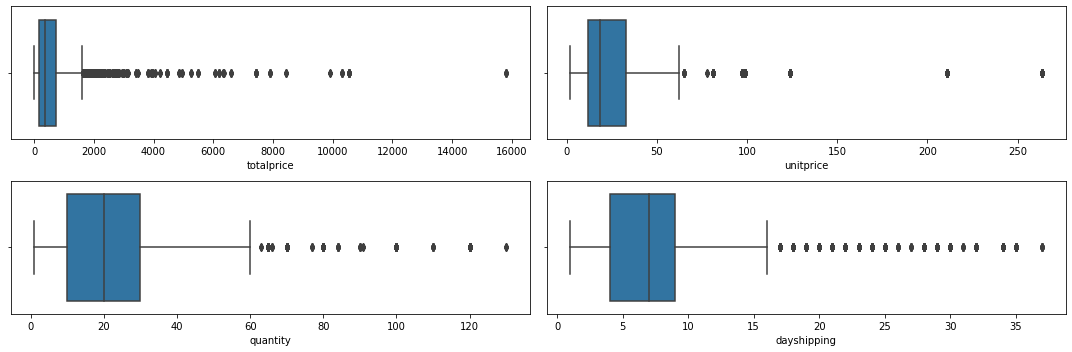

In [882]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(x=df['totalprice'])

plt.subplot(2,2,2)
sns.boxplot(x=df['unitprice'])

plt.subplot(2,2,3)
sns.boxplot(x=df['quantity'])


plt.subplot(2,2,4)
sns.boxplot(x=df['dayshipping'])

plt.tight_layout()


---

# **DATA VISUALIZATION & STATISTICS**


## **Urutan Gaji Tertinggi Karyawan**

Untuk mengetahui performa dari masing-masing karyawan, maka tolak ukur pertama kali yang bisa menjadi patokan adalah besarnya gaji yang diberikan kepada setiap karyawan. Semakin hebat performa dan prestasi seorang karyawan biasanya berbanding lurus dengan gaji yang diberikan oleh perusahaan kepada orang tersebut. Namun pada kasus ini apakah gaji yang diberikan oleh perusahaan Northwind benar-benar sudah sesuai dengan performa masing-masing?

In [883]:
gaji = df[['title','salary','age']].groupby(df['name']).first().sort_values('salary',ascending=False).reset_index()
gaji

,name,title,salary,age
0,Leverling Janet,Sales Representative,3119.15,29
1,Davolio Nancy,Sales Representative,2954.55,44
2,Dodsworth Anne,Sales Representative,2333.33,28
3,Fuller Andrew,"Vice President, Sales",2254.49,40
4,Callahan Laura,Inside Sales Coordinator,2100.50,36
5,Suyama Michael,Sales Representative,2004.07,30
6,King Robert,Sales Representative,1991.55,34
7,Peacock Margaret,Sales Representative,1861.08,56
8,Buchanan Steven,Sales Manager,1744.21,38


<AxesSubplot:xlabel='name', ylabel='salary'>

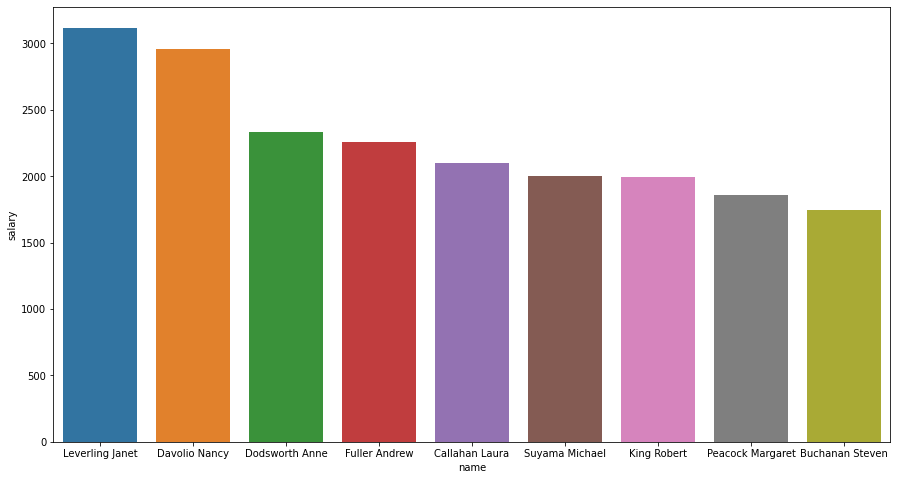

In [884]:
plt.figure(figsize=(15,8))
sns.barplot(x=gaji['name'],y=gaji['salary'])

berdasarkan tabel diatas, dapat terlihat fakta bahwa karyawan bernama ```Leverling Janet``` adalah karyawan dengan gaji yang paling tinggi dibandingkan dengan karyawan lainnya. dan karyawan dengan gaji paling rendah bernama ```Buchanan Steven```. Data yang menarik disini adalah ternyata posisi / jabatan sesorang tidak menentukan besarnya gaji yang diberikan, terlihat dari data bahwa ```Buchanan Steven``` seorang Sales Manager ternyata memiliki gaji paling rendah dibanding bawahannya. Begitupula dengan umur karyawan, biasanya semakin tua umur seseorang, maka pengalamannya dinilai semakin banyak, sehingga perusahaan akan melihat nya sebagai senior staff / orang yang berpengalaman dalam bidang pekerjaannya dan tentu saja gajinya pun biasanya akan lebih besar dibanding orang yg lebih muda / junior staff. Namun sepertinya dalam kasus ini, umur juga tidak menjadi patokan perusahaan dalam penentuan gaji.

## **Total Frekuensi Transaksi Tiap Karyawan**

Performa seorang karyawan juga bisa dilihat dari jumlah transaksi yang dilakukan selama berkerja. semakin banyak jumlah transaksi sukses yang dilakukan artinya revenue untuk perusahaan juga biasanya semakin besar. Sehingga tentunya perusahaan akan memberikan apresiasi tinggi bagi karyawannya yang bisa mendatangkan pemasukan yang besar bagi perusahaan.

In [885]:
total_order = df[['orderdate']].groupby(df['name']).count().reset_index().sort_values('orderdate',ascending=False).rename(columns={'orderdate' : 'jumlah transaksi' })
total_order

,name,jumlah transaksi
5,King Robert,1710
4,Fuller Andrew,1624
6,Leverling Janet,1284
7,Peacock Margaret,1227
1,Callahan Laura,1000
8,Suyama Michael,820
3,Dodsworth Anne,728
0,Buchanan Steven,702
2,Davolio Nancy,628


Text(0.5, 1.0, 'Total Sales per Employee')

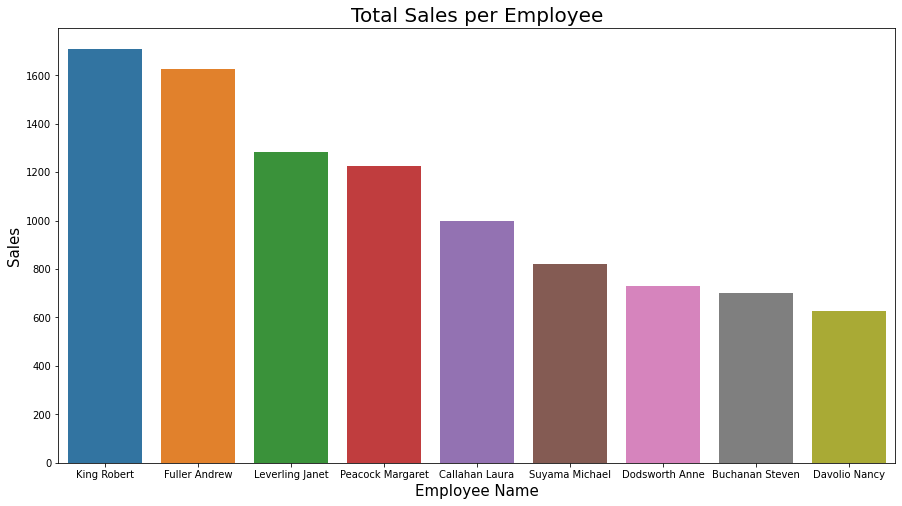

In [886]:
plt.figure(figsize=(15,8))
sns.barplot(x=total_order['name'],y=total_order['jumlah transaksi'])
plt.xlabel('Employee Name',fontsize = 15)
plt.ylabel('Sales',fontsize = 15)
plt.title('Total Sales per Employee',fontsize = 20)

Melihat graphic diatas karyawan bernama ```King Robert``` ternyata memiliki transaksi paling tinggi diantara karyawan lainnya yaitu sebesar 1710 kali transaksi. sedangkan transaksi paling sedikit yaitu oleh karyawan bernama ```Davolio Nancy```

## **Total Revenue Masing-Masing Karyawan**

total revenue masing-masing karyawan didapatkan dari jumlah barang yang dijual dikalikan dengan harga satuannya. Biasanya total revenue masing-masing karyawan ini akan berbanding lurus dengan jumlah transaksi yang dilakukan oleh masing-masing orang. Semakin banyak jumlah transaksinya, maka akan semakin besar pula revenue untuk perusahaan. Sehingga gaji yang bersangkutan pun bisa semakin besar.

In [887]:
rev = df['totalprice'].groupby(df['name']).sum().sort_values(ascending=False)

In [888]:
rev1 = rev.to_frame().reset_index()
rev1

,name,totalprice
0,King Robert,1361031.90
1,Fuller Andrew,1216164.32
2,Leverling Janet,852205.20
3,Peacock Margaret,728083.35
4,Dodsworth Anne,574742.00
5,Callahan Laura,519090.68
6,Buchanan Steven,453406.50
7,Davolio Nancy,394338.22
8,Suyama Michael,384063.00


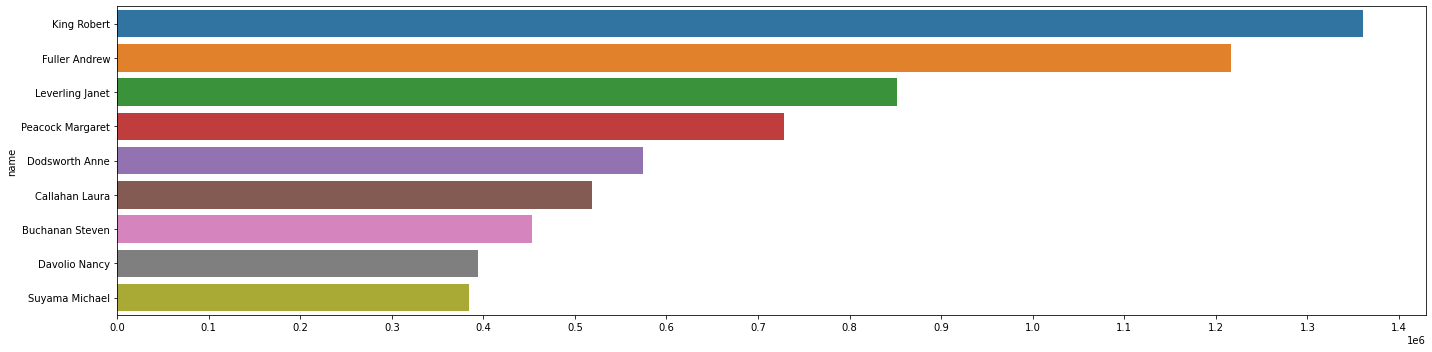

In [889]:
plt.figure(figsize=(20,5))
sns.barplot(y=rev.index,x=rev.values)
plt.xticks(np.arange(0,1500000,100000))
plt.tight_layout()
plt.show()

Dari graphic diatas terbukti bahwa benar pernyataan sebelumnya yaitu semakin tinggi jumlah transaksi seseorang, maka akan semakin besar pula pemasukan terhadap perusahannya. terbukti disini yaitu ```King Robert``` yang telah mencatatkan jumlah transaksi sebanyak 1710 kali transaksi, membuat pemasukan kepada perusahaan sebesar 1361031.90, diikuti oleh ```puller andrew``` dan ```leverling janet``` yg mencatatkan masing-masing pemasukan sebesar  1216164.32 dan  852205.20

### **Jumlah Penjualan yang Dilakukan oleh Tiap Employee di Masing - Masing Kategori Product**

Dari data revenue masing-masing karyawan yang telah dibuat sebelumnya, dapat kita breakdown lagi rinciannya berdasarkan kategori dari jenis produk yang dipasarkan. Nantinya dari sini dapat dilihat produk dari jenis kategori apa yang paling banyak terjual oleh masing-masing karyawan.

In [890]:
sales = pd.crosstab(df['name'],df['category'])
sales

category,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
name,,,,,,,,
Buchanan Steven,126,48,90,186,54,66,60,72
Callahan Laura,188,116,168,132,104,92,60,140
Davolio Nancy,112,50,106,124,34,48,48,106
Dodsworth Anne,168,98,84,168,21,42,14,133
Fuller Andrew,294,168,238,231,189,175,84,245
King Robert,340,200,260,300,150,150,80,230
Leverling Janet,252,112,208,204,148,84,60,216
Peacock Margaret,219,132,204,159,135,102,72,204
Suyama Michael,145,75,110,190,60,50,90,100


In [891]:
cat = df.groupby(['name','category']).count()['product'].to_frame().reset_index()
cat

,name,category,product
0,Buchanan Steven,Beverages,126
1,Buchanan Steven,Condiments,48
2,Buchanan Steven,Confections,90
3,Buchanan Steven,Dairy Products,186
4,Buchanan Steven,Grains/Cereals,54
...,...,...,...
67,Suyama Michael,Dairy Products,190
68,Suyama Michael,Grains/Cereals,60
69,Suyama Michael,Meat/Poultry,50
70,Suyama Michael,Produce,90


<AxesSubplot:xlabel='name', ylabel='product'>

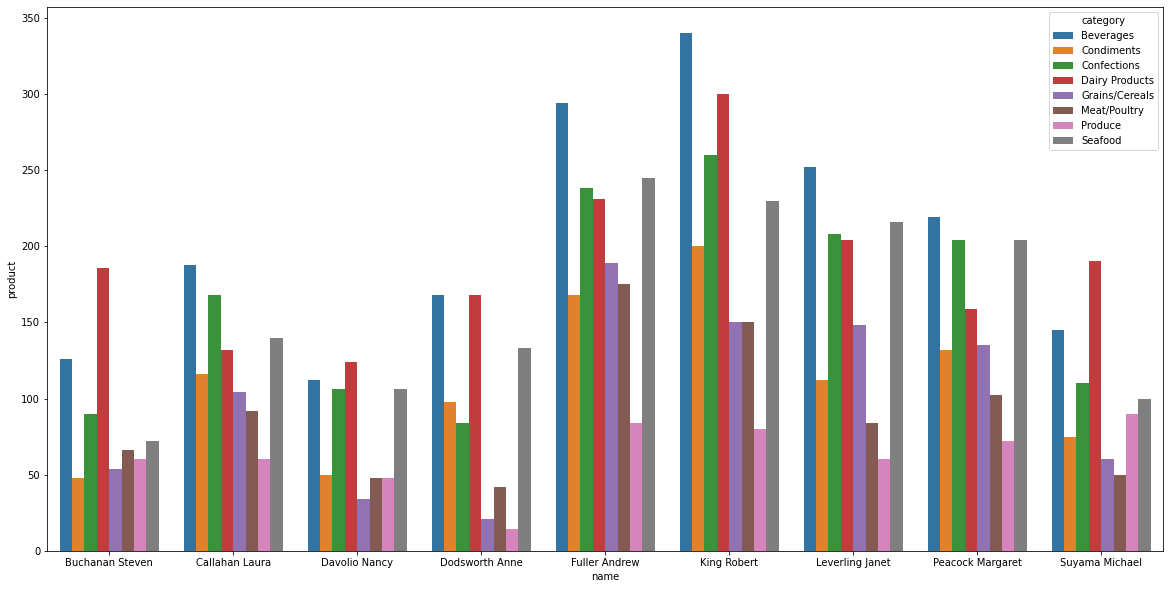

In [892]:
plt.figure(figsize=(20,10))
sns.barplot(x='name',y='product',hue='category',data=cat)

Graphic diatas menunjukkan penjualan produk per kategori oleh tiap-tiap karyawan. Terlihat dengan jelas bahwa karyawan bernama ```King Robert``` ternyata dapat menjual hampir semua kategori produk dengan baik dibandingkan karyawan lainnya. dan produk dengan kategory Beverages sepertinya merupakan produk yang rata-rata paling banyak terjual dari setiap karyawan.

### **Waktu Produk Dikirim dimulai dari Tanggal Order**

dayshipping adalah kolom dimana lama waktu yang diperlukan karyawan yang bersangkutan untuk mengirimkan produk nya ke customer. semakin cepat produk dikrimkan ke perusahaan ekspedisi berarti semakin baik kinerja karyawan tersebut, sedangkan semakin lama waktu produk dikirimkan ke perusahaan ekpedisi berarti semakin buruk performa karyawan tersebut. Perlu menjadi perhatian bahwa waktu pengiriman ini tidak sama dengan waktu yg diperlukan produk untuk sampai ke tangan customer, karena hal tersebut merupakan 2 variabel yang berbeda. Waktu yang diperlukan oleh produk untuk sampai ke tangan customer, bukan ditentukan oleh karyawan, namun tergantung dari perusahaan ekspedisinya, oleh karena itu tidak dapat dijadikan patokan sebagai parameter penilaian performa karyawan. 

In [913]:
sent = df['dayshipping'].groupby(df['name']).mean()
sent1 = sent.to_frame().reset_index()
sent1.sort_values('dayshipping')

,name,dayshipping
0,Buchanan Steven,6.752137
2,Davolio Nancy,7.496815
4,Fuller Andrew,8.245690
5,King Robert,8.280702
6,Leverling Janet,8.529595
8,Suyama Michael,8.542683
1,Callahan Laura,8.620000
7,Peacock Margaret,8.623472
3,Dodsworth Anne,10.394231


berdasarkan data tabel diatas, ```Buchanan Steven``` adalah karyawan yang memiliki performa paling baik dalam hal pengiriman barang, karena hanya memerlukan waktu rata-rata sekitar 6 hari dari rata-rata waktu pengiriman keseluruhan transaksi yang dibuat olehnya. sementara ```Dodsworth Anne``` adalah karyawan yang paling buruk dalam hal pengiriman barang,karena memerlukan waktu yg cukup lama sekitar 10 hari dari rata-rata waktu pengiriman keseluruhan transaksi yang dia buat. Dimana kita tahu, bahwa Semakin cepat produk dikirimkan ke perusahaan ekspedisi, maka akan semakin cepat pula produk tersebut sampai ke tangan customer.

### **Jumlah Territory Kerja Masing-Masing Karyawan**

Setiap karyawan memiliki territory kerja nya masing-masing. semakin luas territory kerja, maka semakin besar peluang untuk bisa memasarkan produknya dengan baik. namun luasnya territory juga sebaiknya diatur sedemikian rupa sehingga beban kerja seseorang tidak menjadi berlebihan dibanding dengan yang lainnya. 

In [893]:
territory = df.drop_duplicates(subset=['territory'])

In [894]:
ter1 = territory['territory'].groupby(territory['name']).count().sort_values(ascending=False)
terr1 = ter1.to_frame().reset_index()
terr1

,name,territory
0,King Robert,10
1,Dodsworth Anne,7
2,Fuller Andrew,7
3,Buchanan Steven,6
4,Suyama Michael,5
5,Callahan Laura,4
6,Leverling Janet,4
7,Peacock Margaret,3
8,Davolio Nancy,2


berdasarkan tabel territory diatas lagi-lagi dapat dilihat bahwa ```king robert``` memilki luas area kerja yang lebih besar dibanding yang lain. Mungkin ini juga menjadi salah satu faktor kenapa ```king robert``` bisa mendapatkan revenue yang besar untuk perusahaan. disamping faktor skill dan keterampilan dari karyawan tersebut. Namun jika dalam hal ini yang ingin kita singgung adalah masalah performa masing-masing karyawan, maka ```King Robert``` bisa dikatakan memiliki performa yang bagus karena dapat memanage 10 area kerja dengan sangat baik sehingga bisa menghasilkan revenue yang besar bagi perusahaan.

### **Revenue Berdasarkan Region**

Setelah mengetahui parameter yang dapat menjadi tolak ukur performa, dari segi strategi pemasaran, langkah apa yang dapat dilakukan perusahaan untuk bisa meningkatkan revenuenya dibanding tahun-tahun sebelumnya? untuk bisa menjawab pertanyaan ini, perlu dianalisa terlebih dahulu secara detail dan mendalam dari masing-masing territory nya, misal target produk dari setiap kategory, kebiasaan masyarakat setempat, pendapatan masyarakat per area, dll. Namun secara gambaran umum dapat kita lihat dari jumlah revenue di masing-masing region seperti pada tabel dan graphic berikut ini.

In [895]:
reg = df['totalprice'].groupby(df['region']).sum()
reg

region
Eastern                                               2791992.39
Northern                                              1093832.68
Southern                                               852205.20
Westerns                                              1745094.90
Name: totalprice, dtype: float64

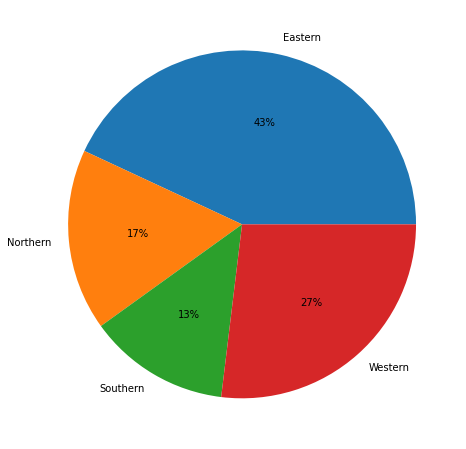

In [896]:
plt.figure(figsize=(10,8))
plt.pie(reg.values,labels=['Eastern','Northern','Southern','Western'],autopct='%.0f%%')
plt.show()

Dari grafik pie chart diatas, dapat dilihat bahwa persentase pemasukan perusahaan 43% berasal dari region eastern. ini berarti produk yang perusahaan jual memiliki kecocokan dengan culture di area tersebut sehingga dapat diterima dengan baik oleh masyarakat setempat. sedangkan penjualan paling rendah berada pada region southern yang hanya menghasilkan 13% dari pemasukan total. yang berarti perlu adanya penyesuain produk / strategi baru jika ingin tetap melanjutkan menjual produk di region tersebut.

In [897]:
regsale = df.groupby(['region','category']).sum('totalprice')['totalprice'].to_frame().reset_index()
regsale.head()

,region,category,totalprice
0,Eastern ...,Beverages,620265.85
1,Eastern ...,Condiments,233161.45
2,Eastern ...,Confections,325884.41
3,Eastern ...,Dairy Products,496001.70
4,Eastern ...,Grains/Cereals,185045.65


<AxesSubplot:xlabel='region', ylabel='totalprice'>

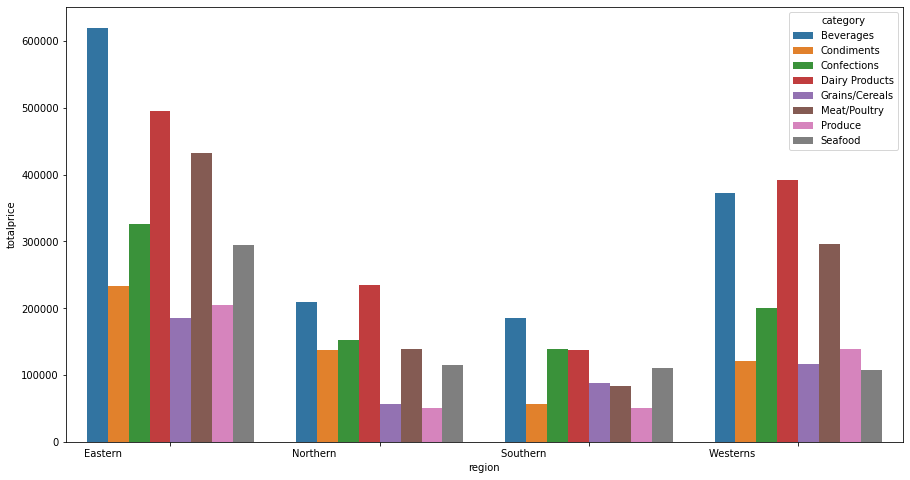

In [898]:
plt.figure(figsize=(15,8))
sns.barplot(x=regsale['region'],y=regsale['totalprice'],hue=regsale['category'])

In [899]:
pd.crosstab(df['region'],df['category'])

category,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
region,,,,,,,,
Eastern,751,398,638,700,412,391,264,627
Northern,356,214,252,300,125,134,74,273
Southern,252,112,208,204,148,84,60,216
Westerns,485,275,370,490,210,200,170,330


berdasarkan tabel dan graphic diatas dapat dilihat detail penjualan produk per kategory di setiap region. untuk region Eastern dan Southern, produk dengan kategory beverages mendominasi penjualan di region tersebut, sedangkan untuk region Northern dan Western, produk dengan kategory dairy product mendominasi penjualan di region tersebut. berdasarkan informasi ini, perusahaan dapat mengambil strategi baru untuk bisa memasarkan produknya secara efektif di masing-masing region penjualan

### **Korelasi Antar Variabel**

Dengan melihat korelasi antar variabel dapat dilihat variabel apa saja yang berpengaruh terhadap suatu variabel tertentu. Hal ini dapat menjadi bahan analisis dalam menginterpretasikan suatu permasalahan nantinya

<AxesSubplot:>

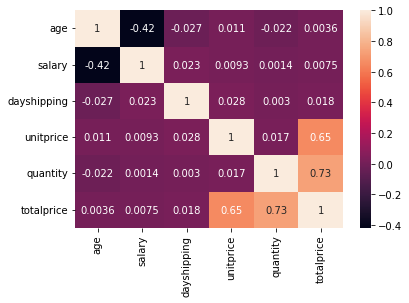

In [900]:
sns.heatmap(df.corr(method='spearman'),annot=True)

dengan melihat korelasi antar variabel, bisa dilihat bahwa pada variabel salary tidak ada korelasi yang kuat dengan variabel lainnya. sehingga penentuan salary menjadi lebih ambigu karena tidak jelas parameter apa yang diukur dari penentuan salary masing-masing karyawan. Sedangkan pada variabel total price dapat terlihat korelasi yang kuat dengan variabel unit price dan quantity, ini dapat diartikan bahwa semakin besar nilai quantity atau unitprice, maka akan semakin besar pula nilai totalprice

# **Uji Hipotesis**

Uji hipotesis digunakan untuk memastikan hipotesis kita akan suatu nilai. Pada uji hipotesis ini akan diuji distribusi dari penyebaran data kolom totalprice, apakah berdistribusi normal atau tidak.

In [901]:
# Uji Normalitas

from scipy.stats import shapiro

norm, pval = shapiro(df['totalprice'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 720x576 with 0 Axes>

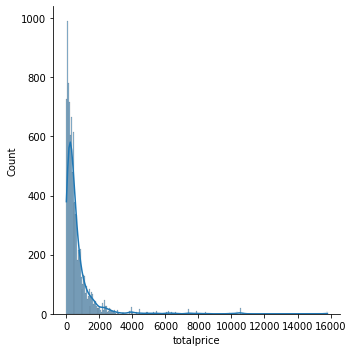

In [902]:
plt.figure(figsize=(10,8))
sns.displot(df['totalprice'],kde=True)
plt.show()

berdasarkan uji hipotesis diatas didapat nilai dari p-value lebih kecil dari alpha (0.05) sehingga dapat ditarik kesimpulan tolak H0. dimana artinya tidak cukup bukti untuk menerima H0, sehingga Ha lah yang dapat kita ambil kesimpulannya. Hasil uji hipotesis ini juga didukung oleh grafik distribution plot diatas dimana kolom total price berbentuk right skewd / distribusi data banyak berada di sebelah kiri.

In [903]:
from scipy.stats import kruskal

krus, pvalkrus = kruskal(
df[df['name']=='Davolio Nancy']['totalprice'],
df[df['name']=='Fuller Andrew']['totalprice'],
df[df['name']=='Leverling Janet']['totalprice'],
df[df['name']=='Peacock Margaret']['totalprice'],
df[df['name']=='Buchanan Steven']['totalprice'],
df[df['name']=='Suyama Michael']['totalprice'],
df[df['name']=='King Robert']['totalprice'],
df[df['name']=='Callahan Laura']['totalprice'],
df[df['name']=='Dodsworth Anne']['totalprice']
)

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 5%)')
    print ('Terdapat Perbedaan Nilai Median totalprice pada Setiap Variabel Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median totalprice pada Setiap Variabel Yang Ada')

Tolak H0 Karena P-Value (2.486085449181084e-05 < 5%)
Terdapat Perbedaan Nilai Median totalprice pada Setiap Variabel Yang Ada


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

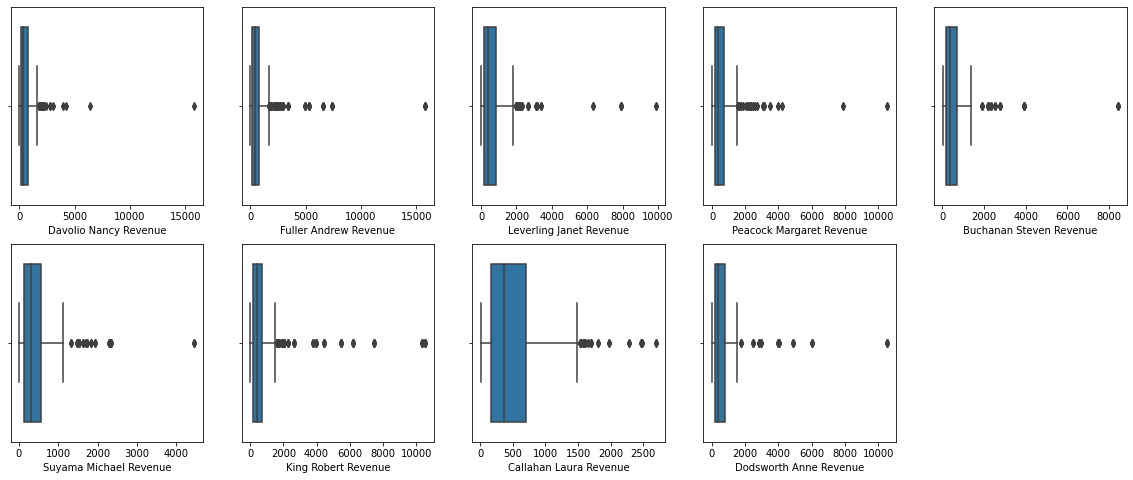

<Figure size 432x288 with 0 Axes>

In [904]:
plt.figure(figsize=(20,8))
plt.subplot(2,5,1)
sns.boxplot(df[df['name']=='Davolio Nancy']['totalprice'])
plt.xlabel('Davolio Nancy Revenue')

plt.subplot(2,5,2)
sns.boxplot(df[df['name']=='Fuller Andrew']['totalprice'])
plt.xlabel('Fuller Andrew Revenue')

plt.subplot(2,5,3)
sns.boxplot(df[df['name']=='Leverling Janet']['totalprice'])
plt.xlabel('Leverling Janet Revenue')

plt.subplot(2,5,4)
sns.boxplot(df[df['name']=='Peacock Margaret']['totalprice'])
plt.xlabel('Peacock Margaret Revenue')

plt.subplot(2,5,5)
sns.boxplot(df[df['name']=='Buchanan Steven']['totalprice'])
plt.xlabel('Buchanan Steven Revenue')

plt.subplot(2,5,6)
sns.boxplot(df[df['name']=='Suyama Michael']['totalprice'])
plt.xlabel('Suyama Michael Revenue')

plt.subplot(2,5,7)
sns.boxplot(df[df['name']=='King Robert']['totalprice'])
plt.xlabel('King Robert Revenue')

plt.subplot(2,5,8)
sns.boxplot(df[df['name']=='Callahan Laura']['totalprice'])
plt.xlabel('Callahan Laura Revenue')

plt.subplot(2,5,9)
sns.boxplot(df[df['name']=='Dodsworth Anne']['totalprice'])
plt.xlabel('Dodsworth Anne Revenue')


plt.show()
plt.tight_layout()


setelah mengetahui bahwa data berditribusi tidak normal, maka selanjutnya adalah uji perbandingan nilai dengan menggunakan kruskal wallis untuk perbandingan nilai lebih dari dua variabel. hasil dari uji kruskal wallis didapat nilai p-value lebih kecil dari alpha (0.05) sehingga dapat ditarik kesimpulan tolak Ho. dimana tidak cukup bukti untuk menerima H0, sehingga Ha lah yang dapat kita ambil kesimpulannnya.

# ***KESIMPULAN***
---

Berdasarkan data-data yang sudah diuji, maka dapat diambil kesimpulan bahwa gaji yang diberikan kepada masing-masing karyawan memiliki ketidaksesuaian dengan performa yang dimiliki. Dapat diambil contoh misal ```Leverling Janet```, memiliki gaji yang paling tinggi diantara karyawan lainnya, padahal jika dilihat dari performa dengan parameter seperti total revenue, umur, jumlah transaksi yang dilakukan, serta waktu pengiriman barang, ```Leverling Janet``` berada di bawah performa ```King Robert```. Sedangkan karyawan yang memiliki performa tinggi, seperti ```King Robert```, gajinya termasuk 3 terbawah. Hal ini perlu segera dibenahi agar resource perusahaan tidak terbuang sia-sia, sehingga karyawan yang berpeforma baik tidak merasa kalau kinerja nya tidak dihargai oleh perusahaan, ditambah lagi beban area kerja yang cukup timpang antara 1 karyawan dengan karyawan lainnya, dikhawatirkan akan menjadi pemicu seseorang karyawan resign karena terbebani dengan beban kerja yang terlalu berat. Perusahaan diharapkan bisa menjaga aset karyawan terbaiknya demi menjaga revenue perusahaan di masa mendatang.

Kemudian untuk bisa meningkatkan revenue lebih baik lagi, dalam hal strategi pemasaran, perusahaan dapat memfokuskan penjualan di area-area/region yang benar-benar berpotensi untuk terjadinya success transaction. seperti misalnya perusahaan dapat fokus menjual produk-produk berkategory beverages untuk wilayah eastern dan southern, sedangkan untuk wilayah northern dan western perusahaan dapat berfokus untuk menjual produk-produk berkategory dairy product. Hal ini bisa terjadi dikarenakan perbedaan culture dan kebiasaan masyarakat setempat sehingga tidak semua category dapat diterima dengan baik di setiap region. atau jika memang ingin tetap menjual produk - produk tersebut di wilayah tersebut perlu adanya penyesuaian agar produk dapat diterima dengan baik di masing-masih region setempat. 

In [915]:
best_performance_employee = gaji.merge(total_order,on='name').merge(rev1,on='name').merge(terr1,on='name').merge(sent1,on='name')
best_performance_employee.sort_values('totalprice',ascending=False)

,name,title,salary,age,jumlah transaksi,totalprice,territory,dayshipping
6,King Robert,Sales Representative,1991.55,34,1710,1361031.90,10,8.280702
3,Fuller Andrew,"Vice President, Sales",2254.49,40,1624,1216164.32,7,8.245690
0,Leverling Janet,Sales Representative,3119.15,29,1284,852205.20,4,8.529595
7,Peacock Margaret,Sales Representative,1861.08,56,1227,728083.35,3,8.623472
2,Dodsworth Anne,Sales Representative,2333.33,28,728,574742.00,7,10.394231
4,Callahan Laura,Inside Sales Coordinator,2100.50,36,1000,519090.68,4,8.620000
8,Buchanan Steven,Sales Manager,1744.21,38,702,453406.50,6,6.752137
1,Davolio Nancy,Sales Representative,2954.55,44,628,394338.22,2,7.496815
5,Suyama Michael,Sales Representative,2004.07,30,820,384063.00,5,8.542683
